In [ ]:
%pip install -r requirements.txt

# Simple Moving Average (SMA) Crossover Strategy

This backtest implements a dual-SMA crossover strategy using VIC stock data:

- **Short-term trend**: 50-day simple moving average (SMA50)
- **Long-term trend**: 200-day simple moving average (SMA200)

**Signals**:
- **Buy** when SMA50 crosses above SMA200.
- **Sell** (go to cash) when SMA50 crosses below SMA200.

The performance is evaluated by comparing the cumulative returns of the strategy against the buy-and-hold market return.

In [ ]:
import vnstock as vns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Download historical data for ticker 'VIC' from 2020-01-01 to 2025-01-01
df = vns.Quote(symbol='VIC').history(start='2020-01-01', end='2024-05-25')

# Save to CSV
csv_path = 'vic_data.csv'
df.to_csv(csv_path, index=False)
print(f"Data saved to {csv_path}, rows: {len(df)}")

Data saved to vic_data.csv, rows: 1095


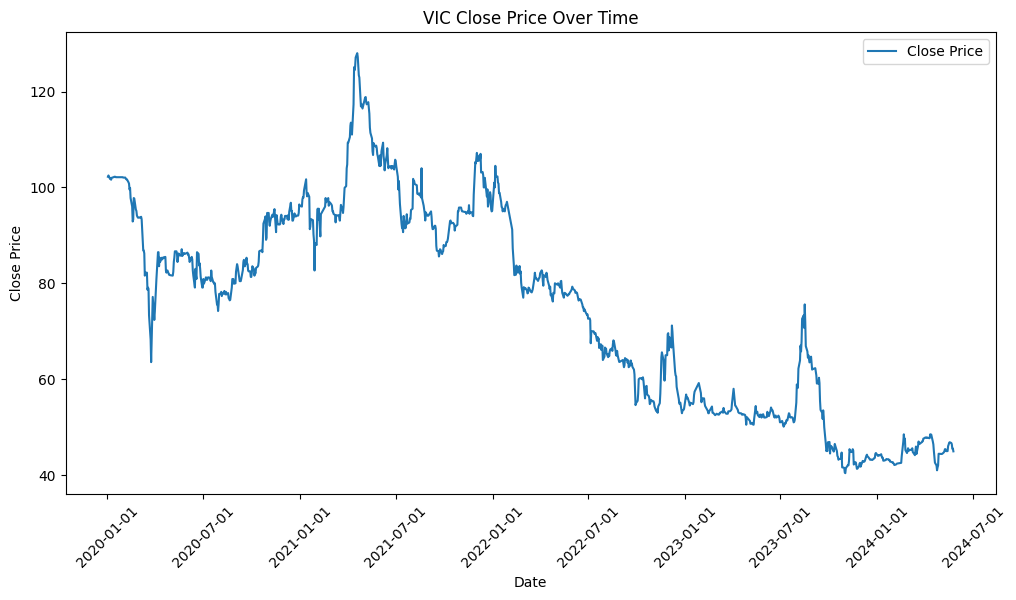

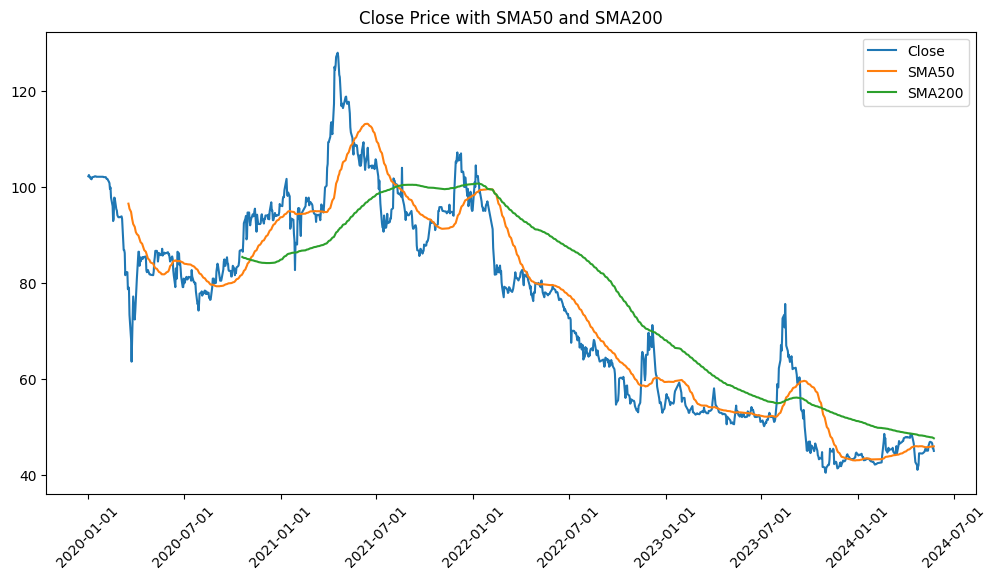

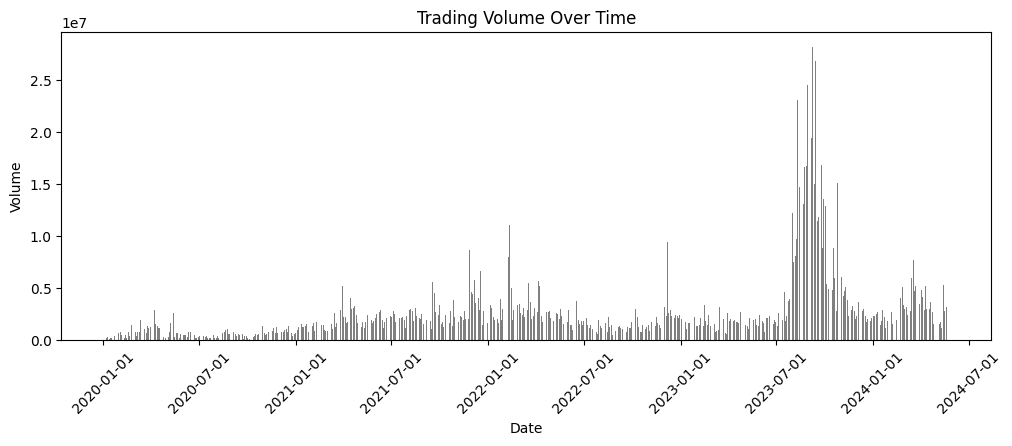

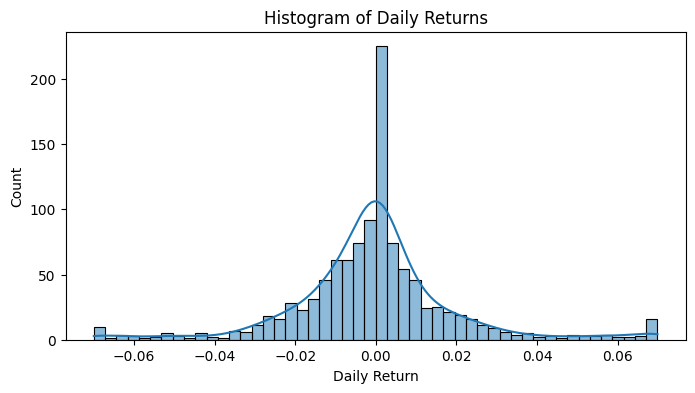

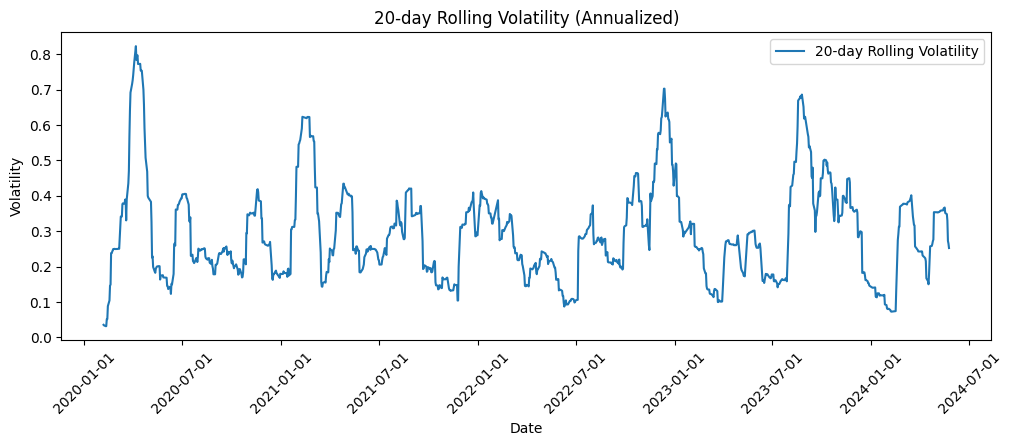

In [18]:
# Additional Analysis: Visualizing Trends
import seaborn as sns
import vnstock as vns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Load data and set datetime index
df = pd.read_csv('vic_data.csv', parse_dates=['time'])
df.set_index('time', inplace=True)

# Calculate SMA50 and SMA200 for visualization
short_window = 50
long_window = 200
df['SMA50'] = df['close'].rolling(window=short_window).mean()
df['SMA200'] = df['close'].rolling(window=long_window).mean()

# Close price over time
plt.figure(figsize=(12,6))
plt.plot(df['close'], label='Close Price')
ax = plt.gca()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45)
plt.title('VIC Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# SMA50 and SMA200
plt.figure(figsize=(12,6))
plt.plot(df['close'], label='Close')
plt.plot(df['SMA50'], label='SMA50')
plt.plot(df['SMA200'], label='SMA200')
ax = plt.gca()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45)
plt.title('Close Price with SMA50 and SMA200')
plt.legend()
plt.show()

# Volume over time
plt.figure(figsize=(12,4))
plt.bar(df.index, df['volume'], color='grey')
ax = plt.gca()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45)
plt.title('Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.show()

# Histogram of daily returns
df['daily_return'] = df['close'].pct_change()
plt.figure(figsize=(8,4))
sns.histplot(df['daily_return'].dropna(), bins=50, kde=True)
plt.title('Histogram of Daily Returns')
plt.xlabel('Daily Return')
plt.show()

# 20-day rolling volatility (annualized)
df['rolling_vol'] = df['daily_return'].rolling(window=20).std() * np.sqrt(252)
plt.figure(figsize=(12,4))
plt.plot(df['rolling_vol'], label='20-day Rolling Volatility')
ax = plt.gca()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45)
plt.title('20-day Rolling Volatility (Annualized)')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.show()

Market Return: -56.03%
Strategy Return: -40.20%


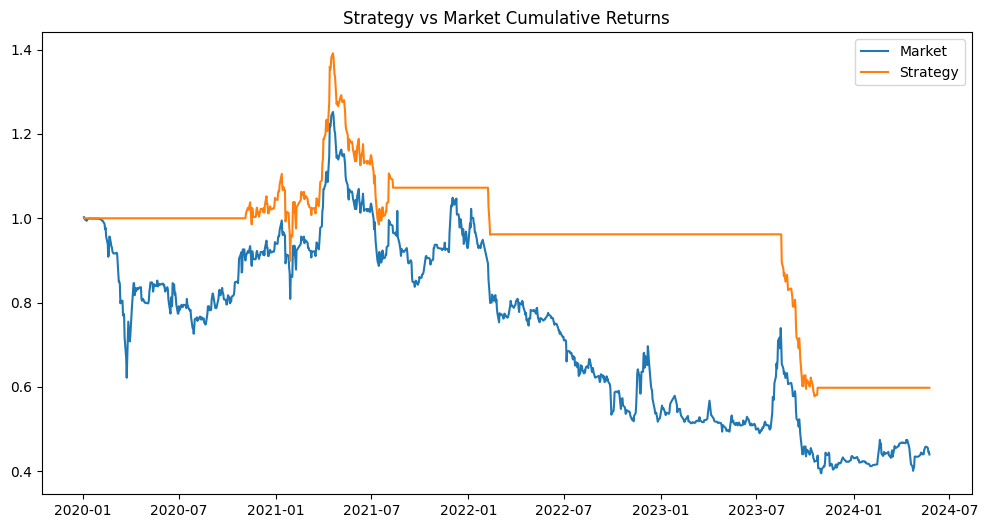

In [11]:
df = pd.read_csv('vic_data.csv', parse_dates=['time'])
df.set_index('time', inplace=True)

# Simple strategy: 50-day SMA and 200-day SMA crossover
short_window = 50
long_window = 200

df['SMA50'] = df['close'].rolling(window=short_window).mean()
df['SMA200'] = df['close'].rolling(window=long_window).mean()

# Generate signals: 1 when SMA50 crosses above SMA200, -1 when crosses below
df['signal'] = 0
df.loc[df.index[short_window:], 'signal'] = np.where(df['SMA50'].iloc[short_window:] > df['SMA200'].iloc[short_window:], 1, 0)
df['positions'] = df['signal'].diff()

# Calculate returns
df['market_return'] = df['close'].pct_change()
df['strategy_return'] = df['market_return'] * df['signal'].shift(1)

# Compute cumulative returns
cumulative_market = (1 + df['market_return']).cumprod()
cumulative_strategy = (1 + df['strategy_return']).cumprod()

# Print performance
print(f"Market Return: {cumulative_market.iloc[-1]-1:.2%}")
print(f"Strategy Return: {cumulative_strategy.iloc[-1]-1:.2%}")

# Plot results
plt.figure(figsize=(12,6))
plt.plot(cumulative_market, label='Market')
plt.plot(cumulative_strategy, label='Strategy')
plt.title('Strategy vs Market Cumulative Returns')
plt.legend()
plt.show()